In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Step 3: Load the Sales Data from Excel file
data = pd.read_excel('sales_data.xlsx')

# Display the first few rows of the data to understand its structure
print(data.head())

                  Order Date  TotalSales
0    Tuesday, 1 January 2019          74
1  Wednesday, 2 January 2019         406
2   Thursday, 3 January 2019        2096
3     Friday, 4 January 2019        1069
4   Saturday, 5 January 2019         256


In [3]:
# Step 4: Explore and Prepare Data
# Assuming the data contains columns like 'Order Date' and 'Total Sales'.
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [4]:
# Extract features like year, month, day
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day

In [5]:
# Step 5: Train a Machine Learning Model
# Assuming 'Total Sales' is the target variable (dependent variable)
X = data[['Year', 'Month', 'Day']]  # Features
y = data['TotalSales']  # Target variable

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
# Step 6: Forecast Sales for the Next 15 Days
last_date = data['Order Date'].max()  # Get the latest date in the dataset
forecast_dates = [last_date + timedelta(days=i) for i in range(1, 16)]  # Generate dates for the next 15 days


In [7]:
# Extract features for forecasting
forecast_features = pd.DataFrame({
    'Year': [date.year for date in forecast_dates],
    'Month': [date.month for date in forecast_dates],
    'Day': [date.day for date in forecast_dates]
})


In [8]:
# Make predictions for the next 15 days
forecast_sales = model.predict(forecast_features)


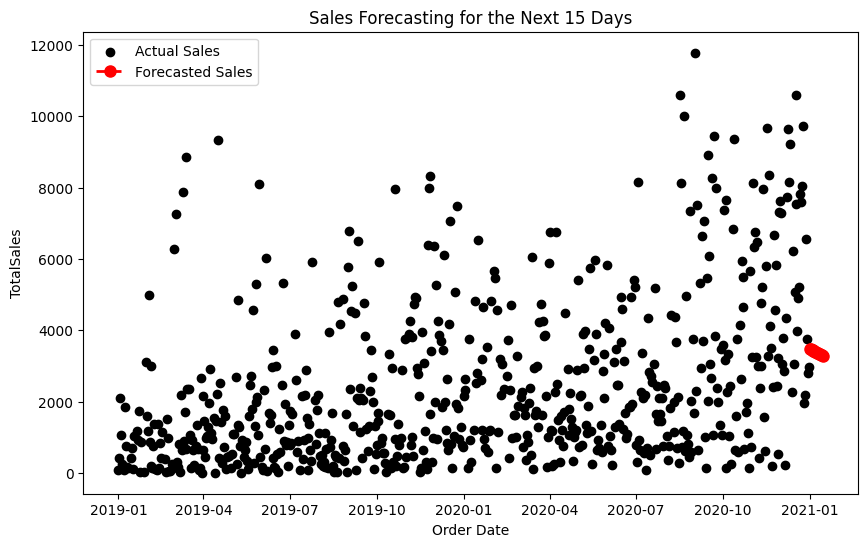

In [15]:
# Step 7: Visualize the Results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Actual Sales
ax.scatter(data['Order Date'], data['TotalSales'], color='black', label='Actual Sales')

# Plot Forecasted Sales
ax.plot(forecast_dates, forecast_sales, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='Forecasted Sales')

ax.set_xlabel('Order Date')
ax.set_ylabel('TotalSales')
ax.set_title('Sales Forecasting for the Next 15 Days')
ax.legend()

plt.show()

In [16]:
# Step 7: Display Forecast Data in Table
forecast_table = pd.DataFrame({
    'Forecast Date': forecast_dates,
    'Forecasted Sales': forecast_sales
})

print("\nForecast Data for the Next 15 Days:")
print(forecast_table)


Forecast Data for the Next 15 Days:
   Forecast Date  Forecasted Sales
0     2021-01-01       3485.517449
1     2021-01-02       3470.829294
2     2021-01-03       3456.141139
3     2021-01-04       3441.452984
4     2021-01-05       3426.764829
5     2021-01-06       3412.076674
6     2021-01-07       3397.388519
7     2021-01-08       3382.700364
8     2021-01-09       3368.012209
9     2021-01-10       3353.324054
10    2021-01-11       3338.635899
11    2021-01-12       3323.947744
12    2021-01-13       3309.259589
13    2021-01-14       3294.571434
14    2021-01-15       3279.883279


In [18]:
forecast_table = pd.DataFrame({
    'Forecast Date': forecast_dates,
    'Forecasted Sales': forecast_sales.astype(int)  # Convert to whole numbers
})

print("\nForecast Data for the Next 15 Days:")
print(forecast_table)


Forecast Data for the Next 15 Days:
   Forecast Date  Forecasted Sales
0     2021-01-01              3485
1     2021-01-02              3470
2     2021-01-03              3456
3     2021-01-04              3441
4     2021-01-05              3426
5     2021-01-06              3412
6     2021-01-07              3397
7     2021-01-08              3382
8     2021-01-09              3368
9     2021-01-10              3353
10    2021-01-11              3338
11    2021-01-12              3323
12    2021-01-13              3309
13    2021-01-14              3294
14    2021-01-15              3279
